In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My Projects/California House Pricing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


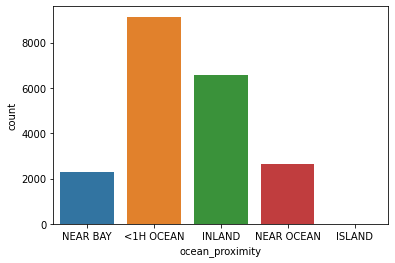

In [ ]:
sns.countplot(df['ocean_proximity'])
plt.show()

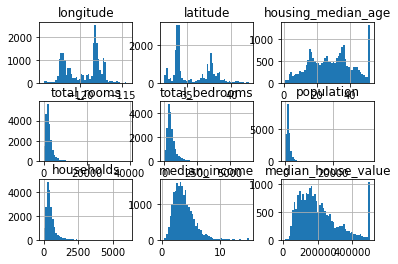

In [ ]:
df.hist(bins = 50)
plt.show()

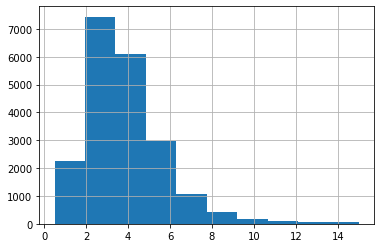

In [ ]:
df['median_income'].hist()
plt.show()

In [ ]:
# divide the income category to limit the number of income category
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].unique()

array([ 6.,  5.,  4.,  3.,  2.,  1.,  8.,  7.,  9., 11., 10.])

In [ ]:
df['income_cat'].where(df['income_cat'] < 5, other = 5.0, inplace=True)

In [ ]:
df['income_cat'].unique()

array([5., 4., 3., 2., 1.])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 29)
## explanation at 32:00 at, https://youtu.be/kUsNb_gOo_s

for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
df['income_cat'].value_counts() / len(df)
## category 3.0 ratio is 0.35 w.r.t rows of main dataframe 
## category 2.0 ratio is 0.31 w.r.t rows of main dataframe
## category 4.0 ratio is 0.17 w.r.t rows of main dataframe
## category 5.0 ratio is 0.11 w.r.t rows of main dataframe
## category 1.0 ratio is 0.03 w.r.t rows of main dataframe

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

**As seen above the proportions are maintained in the test set as well as train set using stratified sampeling**

***Why stratified ?***   
*Because the feature-space are less and also because its mid size dataset & we dont want to miss out any classs*

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)
## category 3.0 ratio is 0.35 w.r.t. rows of strat_test_set
## category 2.0 ratio is 0.31 w.r.t. rows of strat_test_set
## category 4.0 ratio is 0.17 w.r.t. rows of strat_test_set
## category 5.0 ratio is 0.11 w.r.t. rows of strat_test_set
## category 1.0 ratio is 0.03 w.r.t. rows of strat_test_set

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [ ]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)
## category 3.0 ratio is 0.35 w.r.t. rows of strat_train_set
## category 2.0 ratio is 0.31 w.r.t. rows of strat_train_set
## category 4.0 ratio is 0.17 w.r.t. rows of strat_train_set
## category 5.0 ratio is 0.11 w.r.t. rows of strat_train_set
## category 1.0 ratio is 0.03 w.r.t. rows of strat_train_set

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [ ]:
# experimenting with the random sampeling now !
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 29 )

In [ ]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

comparing_props = pd.DataFrame({
    "Overall Props" : income_cat_proportions(df),
    "random" : income_cat_proportions(test_set),
    "stratified" : income_cat_proportions(strat_test_set) 
}).sort_index()

comparing_props['random %error'] = 100 * comparing_props["random"] / comparing_props['Overall Props'] - 100
comparing_props['strat %error'] = 100 * comparing_props["stratified"] / comparing_props['Overall Props'] - 100


In [ ]:
comparing_props

,Overall Props,random,stratified,random %error,strat %error
1.0,0.039826,0.042636,0.039729,7.055961,-0.243309
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114583,4.360711,0.127011


In [ ]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [ ]:
for items in (strat_test_set, strat_train_set):
    items.drop("income_cat", axis = 1, inplace=True)

In [ ]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

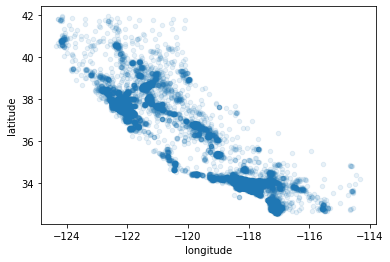

In [ ]:
df = strat_train_set.copy()
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)
plt.show()

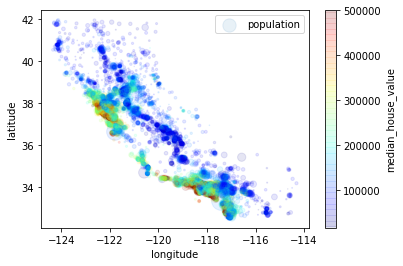

In [ ]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1,
                s = df['population']/100, label = "population" ,
                c = 'median_house_value', cmap = plt.get_cmap("jet"), sharex = False
             )
plt.legend()
plt.show()
# see explaination at 55:55, at https://youtu.be/kUsNb_gOo_s


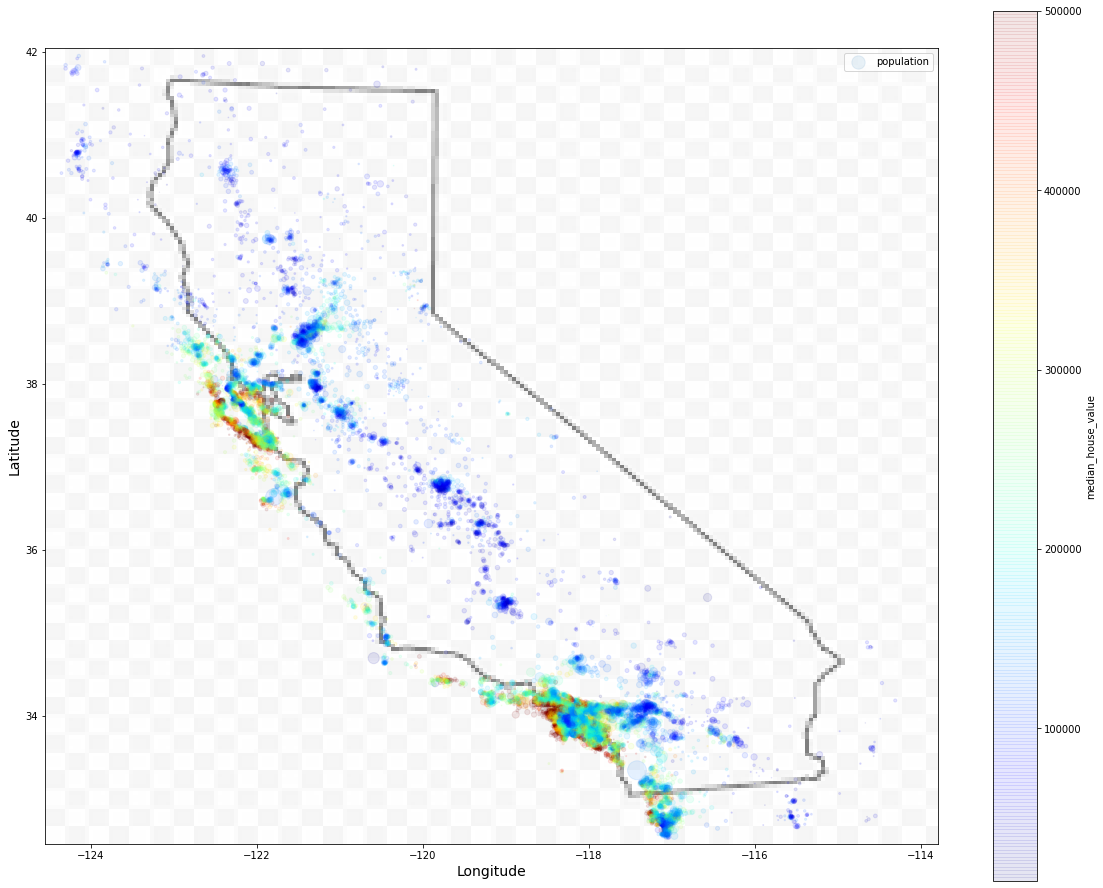

In [ ]:
import matplotlib.image as mpimg

ax = df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1,
                s = df['population']/100, label = "population" , figsize = (20,16),
                c = 'median_house_value', cmap = plt.get_cmap("jet"), sharex = False
             )

ca_img = mpimg.imread("/content/drive/MyDrive/Colab Notebooks/My Projects/California House Pricing/download.png")
plt.imshow(ca_img, extent = [-124.55,-113.8, 32.46, 42.05], alpha = 0.5, cmap = plt.get_cmap("jet"))
plt.xlabel("Longitude", fontsize = 14)
plt.ylabel("Latitude", fontsize = 14)
plt.show()

In [ ]:
corr_mat = df.corr()
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

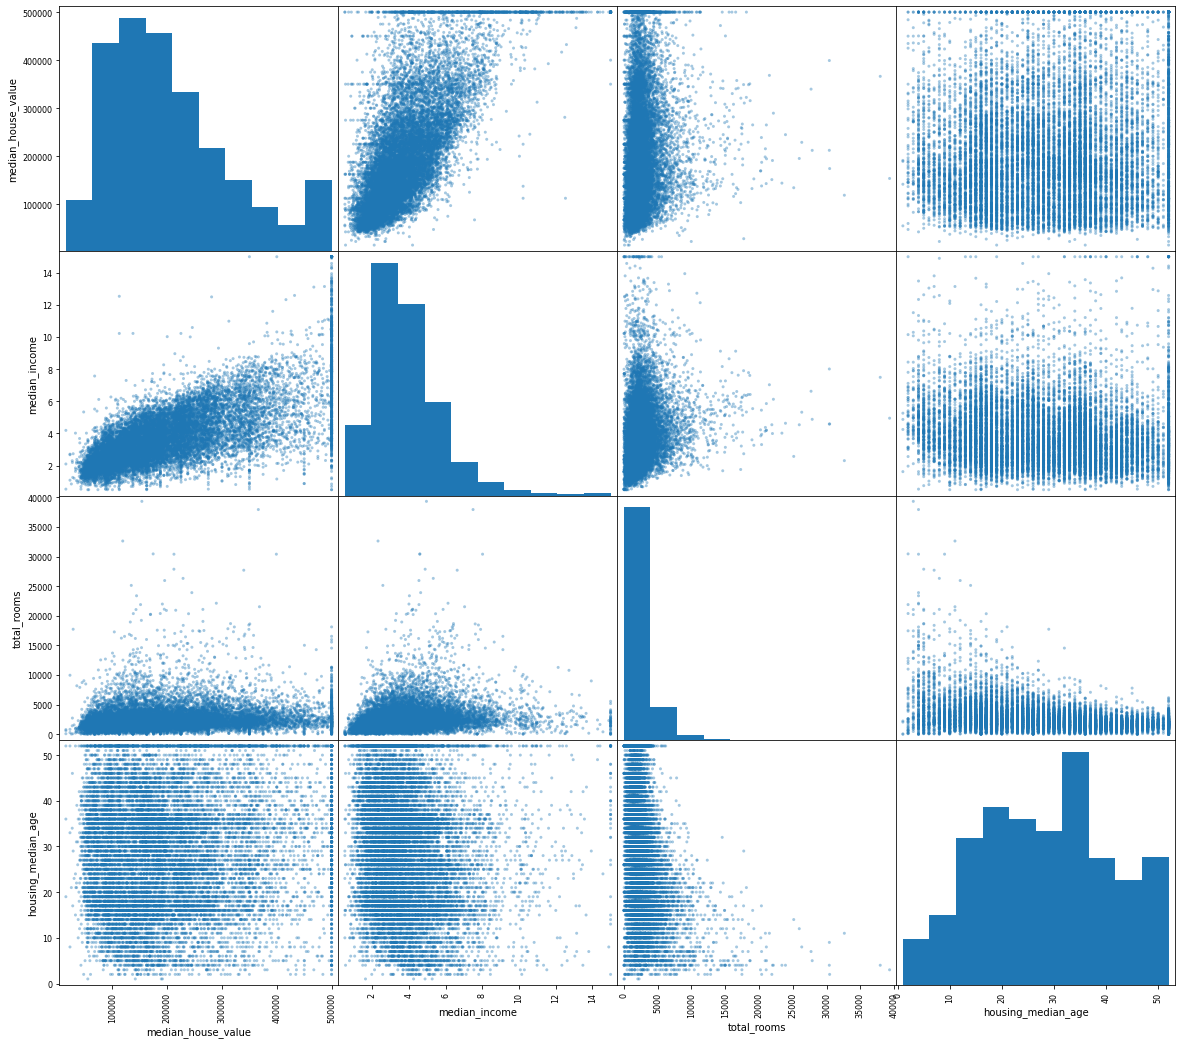

In [ ]:
# other approch is to use the scatter plot in a vs b fashion
# but the prooblem is that for n features , there will be n^2 plots

imp_attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
from pandas.plotting import scatter_matrix

scatter_matrix(df[imp_attributes], figsize = (20,18), alpha = 0.4)
plt.show()

# Feature Engeneering

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df['bedroomd_per_rooms'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroomd_per_rooms',
       'population_per_household', 'rooms_per_household'],
      dtype='object')

the new `bedrooms_per_room` is highly corelated but in reciprocative way to the `median_house_value` so the houses with lesser bedroom/room ratio tend to more expensive

In [ ]:
corr_mat = df.corr()
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedroomd_per_rooms         -0.253572
Name: median_house_value, dtype: float64

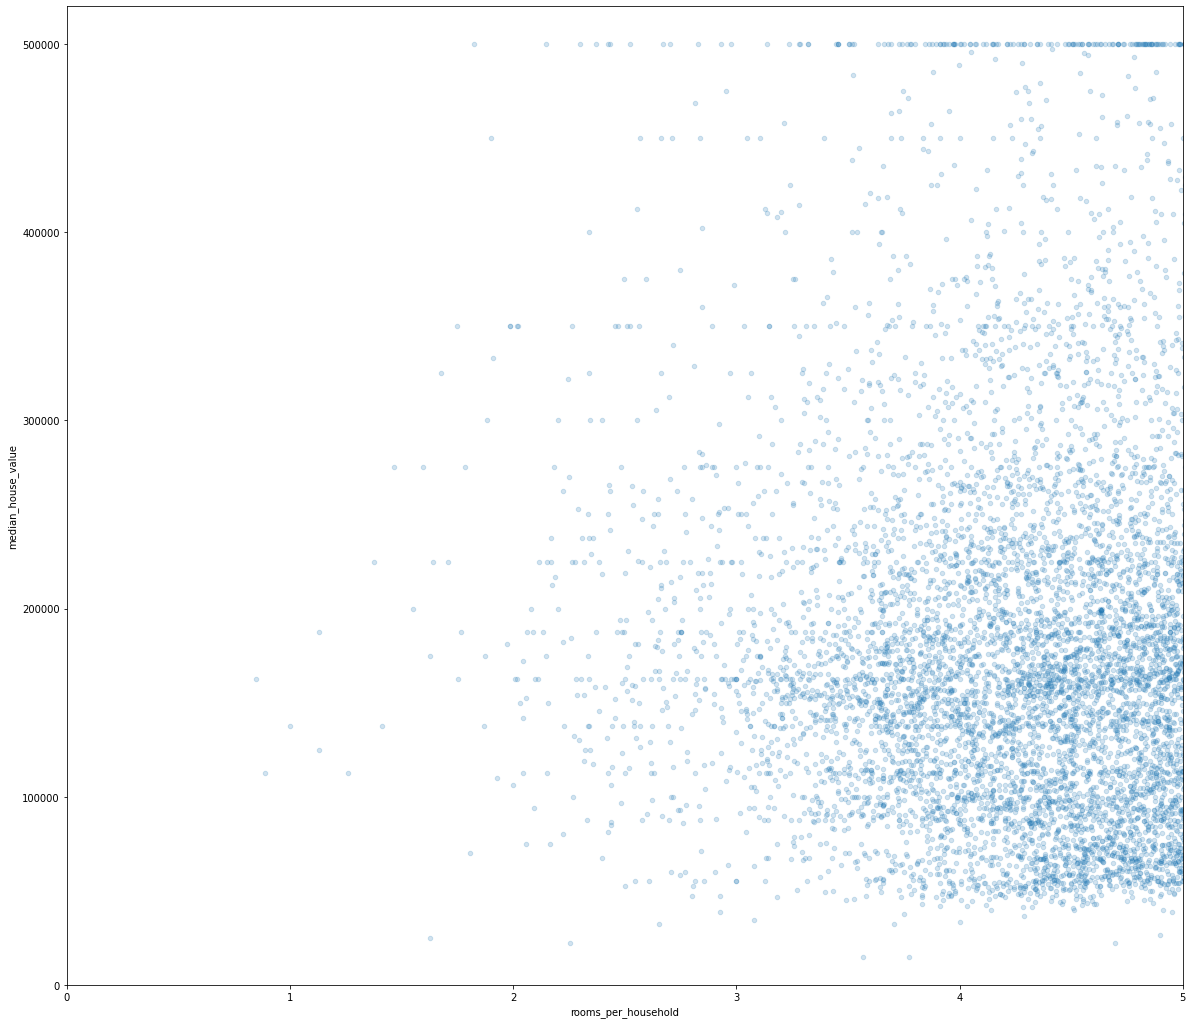

In [ ]:
df.plot(kind ="scatter", x = "rooms_per_household", y = "median_house_value", alpha = 0.2, figsize = (20,18))
plt.axis([0,5,0,520000])
plt.show()

# **Preparing the dataset**

In [ ]:
df = strat_train_set.drop("median_house_value", axis = 1)
df_labels = strat_train_set['median_house_value'].copy()

* data cleaning

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
df_labels.head()

7771     166200.0
9352     500001.0
18657    263800.0
4873      38800.0
12350     94800.0
Name: median_house_value, dtype: float64

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
median = df['total_bedrooms'].median()
sample_incomplete_rows = df[df.isnull().any(axis = 1)].head()
sample_incomplete_rows['total_bedrooms' ].fillna(median, inplace=True)
sample_incomplete_rows.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

* Handling categorical values

In [ ]:
housing_cat = df['ocean_proximity']
housing_cat.head()

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
Name: ocean_proximity, dtype: object

In [ ]:
housing_cat.unique()

array(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'],
      dtype=object)

In [ ]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [ ]:
housing_cat_encoded[:10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2])

In [ ]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

# **Custom Transformations**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedroom_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedroom_perroom  = True):
        self.add_bedroom_perroom = add_bedroom_perroom
    
    def fit(self, x, y = None):
        return self # nothing to do here
    
    def transform(self, x, y = None):
        rooms_per_household = x[:, room_ix] / x[:, household_ix]
        population_per_household = x[:, population_ix] / x[:, household_ix]

        if self.add_bedroom_perroom:
            bedroomds_perroom = x[:, bedroom_ix] / x[:, room_ix]
            return np.c_[x,rooms_per_household, population_per_household, bedroomds_perroom]
        else:
            return np.c_[x,rooms_per_household, population_per_household]



        

# 02:06:00

In [ ]:
housing_num = df.drop("ocean_proximity", axis = 1)
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [ ]:
attr_addr = CombinedAttributesAdder(add_bedroom_perroom=False)
housing_extra_arribs = attr_addr.transform(df.values)

In [ ]:
housing_extra_arribs = pd.DataFrame(housing_extra_arribs, columns = list(df.columns)+["rooms_per_household", "population_per_household"])
housing_extra_arribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


# Setting up the pipeline all the preprocessing 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


num_pipeline = Pipeline([
            ("imputer" , SimpleImputer(strategy = "median")),
            ("attributes_add" , CombinedAttributesAdder()),
            ("Std_Scaler" , StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr


array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, x ,y = None):
        return self
    
    def transform(self, x, y =None):
        return x[self.attribute_names].values
    

In [ ]:
## complete pipeline
num_attrbs = list(housing_num.columns)
cat_attrbs = ["ocean_proximity"]



num_pipeline = Pipeline([
            ("selecter", DataFrameSelector(num_attrbs)),
            ("imputer", SimpleImputer(strategy = "median")),
            ("attribs_adder", CombinedAttributesAdder()),
            ("Std_Scaler" , StandardScaler())
])

cat_pipeline = Pipeline([
           ("selector", DataFrameSelector(cat_attrbs)),
           ("cat_encoder", OneHotEncoder())
           # to avoid sparse matrix ^              
])


In [ ]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list = [
              ("num_pipeline",num_pipeline),
              ("cat_pipeline", cat_pipeline)                                   
])

In [ ]:
housing_prepared = full_pipeline.fit_transform(df)
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

# Selecting and training models

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(housing_prepared, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
 # trying the full pipeline on a few training instances
 some_data = df.iloc[:5]
 some_labels = df_labels.iloc[:5]
 some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Prediction : ", regressor.predict(some_data_prepared))
print("Actual Lables : ", list(some_labels))

Prediction :  [209526.30066675 455497.75908655 252936.22215264 173615.33071976
 114294.56557396]
Actual Lables :  [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = regressor.predict(housing_prepared)

lin_mse = mean_squared_error(df_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, df_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
hosinng_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(df_labels, hosinng_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Cross Validaition

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, df_labels, cv = 10, scoring = "neg_mean_squared_error")
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores) : 
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Std Deviation : ", scores.std())

display_scores(tree_rmse_scores)

Scores :  [70136.31890609 68696.91624006 67945.32777438 72200.55206182
 69075.36804579 69470.28315032 68641.4560221  69641.83025261
 65870.47364824 71625.52637685]
Mean :  69330.40524782616
Std Deviation :  1705.9291172506669


Checking the linear regression cross validation

In [ ]:
lin_scores = cross_val_score(regressor, housing_prepared, df_labels, cv = 10, scoring = "neg_mean_squared_error")
lin_rmse = np.sqrt(-lin_scores)
display_scores(lin_rmse)

Scores :  [67641.22210658 69245.15589711 65690.83403174 67581.65192198
 66586.04760032 66937.30770654 67397.33645542 69807.64174495
 66660.63450493 74883.89423445]
Mean :  68243.17262040282
Std Deviation :  2500.7262189379467


Checking the Random Forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state = 28)
forest_reg.fit(housing_prepared, df_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=28, verbose=0, warm_start=False)

In [ ]:
housing_pred = forest_reg.predict(housing_prepared)
forest_scores = cross_val_score(regressor, housing_prepared, df_labels, cv = 10, scoring = "neg_mean_squared_error")
forest_rmse = np.sqrt(-forest_scores)
display_scores(forest_rmse)

Scores :  [67641.22210658 69245.15589711 65690.83403174 67581.65192198
 66586.04760032 66937.30770654 67397.33645542 69807.64174495
 66660.63450493 74883.89423445]
Mean :  68243.17262040282
Std Deviation :  2500.7262189379467


In [ ]:
from sklearn.model_selection import GridSearchCV
params_grid = [
        {'n_estimators' : [3,10,30], 'max_features':[2,4,6,8] },
        {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features' : [2,3,4]}
]

rf_reg = RandomForestRegressor()
grid_search  = GridSearchCV(rf_reg, params_grid, cv = 5, scoring = "neg_mean_squared_error")
grid_search.fit(housing_prepared,  df_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res['params']):
    print(np.sqrt(-mean_score), params)

62629.32096100153 {'max_features': 2, 'n_estimators': 3}
54742.89051978412 {'max_features': 2, 'n_estimators': 10}
52246.92094614166 {'max_features': 2, 'n_estimators': 30}
59731.49649954548 {'max_features': 4, 'n_estimators': 3}
52176.54621039707 {'max_features': 4, 'n_estimators': 10}
49957.24847828048 {'max_features': 4, 'n_estimators': 30}
59265.383872994644 {'max_features': 6, 'n_estimators': 3}
51087.07337563141 {'max_features': 6, 'n_estimators': 10}
49270.71331777342 {'max_features': 6, 'n_estimators': 30}
58138.91596797879 {'max_features': 8, 'n_estimators': 3}
51938.01724628557 {'max_features': 8, 'n_estimators': 10}
49427.72486098816 {'max_features': 8, 'n_estimators': 30}
61260.352392795015 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53544.80228393465 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59559.9517179462 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51875.88257540291 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1